#### Binary classification of IMDB dataset in Keras

This notebook is for the binary classification of **IMDB dataset** in Keras. Since IMDB dataset comes packaged with the Keras so you don't have to download it from any website. 

The IMDB dataset a set of 50,000 reviews from the Internet Movie Database. The dataset split into 25,000 reviews for training and 25,000 reviews for testing, each set consisting in 50% negative and 50% positive reviews.

The IMDB dataset comes packaged with Keras and it is also preprocessed. The reviews (sequences of words) have been turned into sequences of integers, where each integer stands for a specific word in a dectionary. *We can see the sequences of integers once we will load the dataset*.  


In [6]:
# import the libraries 
import numpy as np
from keras import models
from keras import layers
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
# Loading the dataset
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=15000) #The argument 15,000 means we are 
# only keeping most frequent 15,000 words. 
#The variables train_data and text_data 
# are lists of reviews, train_labels and test_labels are lists of 0s and 1s for negative and positive reviews respectively.  

In [12]:
# Let's check train_data 
train_data[1] #We can see sequence of integer (Every integer represents some specific word in a dectionary)

[1,
 194,
 1153,
 194,
 8255,
 78,
 228,
 5,
 6,
 1463,
 4369,
 5012,
 134,
 26,
 4,
 715,
 8,
 118,
 1634,
 14,
 394,
 20,
 13,
 119,
 954,
 189,
 102,
 5,
 207,
 110,
 3103,
 21,
 14,
 69,
 188,
 8,
 30,
 23,
 7,
 4,
 249,
 126,
 93,
 4,
 114,
 9,
 2300,
 1523,
 5,
 647,
 4,
 116,
 9,
 35,
 8163,
 4,
 229,
 9,
 340,
 1322,
 4,
 118,
 9,
 4,
 130,
 4901,
 19,
 4,
 1002,
 5,
 89,
 29,
 952,
 46,
 37,
 4,
 455,
 9,
 45,
 43,
 38,
 1543,
 1905,
 398,
 4,
 1649,
 26,
 6853,
 5,
 163,
 11,
 3215,
 10156,
 4,
 1153,
 9,
 194,
 775,
 7,
 8255,
 11596,
 349,
 2637,
 148,
 605,
 2,
 8003,
 15,
 123,
 125,
 68,
 2,
 6853,
 15,
 349,
 165,
 4362,
 98,
 5,
 4,
 228,
 9,
 43,
 2,
 1157,
 15,
 299,
 120,
 5,
 120,
 174,
 11,
 220,
 175,
 136,
 50,
 9,
 4373,
 228,
 8255,
 5,
 2,
 656,
 245,
 2350,
 5,
 4,
 9837,
 131,
 152,
 491,
 18,
 2,
 32,
 7464,
 1212,
 14,
 9,
 6,
 371,
 78,
 22,
 625,
 64,
 1382,
 9,
 8,
 168,
 145,
 23,
 4,
 1690,
 15,
 16,
 4,
 1355,
 5,
 28,
 6,
 52,
 154,
 462,
 33,
 89,

In [13]:
# Let's check label_data
train_labels[1] #The movie review of train_data is negative 

0

In [18]:
#Data Prepration 
#The current data set is in sequence of integer so we have to convert into vectorize form.
#let's vectorize our data
#Let's vectorize movie sequence of integer

def vectorize_sequences(sequences, dimension=15000):
    results = np.zeros((len(sequences), dimension)) #We are creating an all-zero matrix of shape (len(sequences), dimension)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

#Traning data after vectoriziation
x_train = vectorize_sequences(train_data)
#Test data after vectorization
x_test = vectorize_sequences(test_data)

In [19]:
#Let's check 
x_train[1]

array([ 0.,  1.,  1., ...,  0.,  0.,  0.])

In [20]:
#Let's vectorize labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [21]:
#Building the network 
#We are building 3 layer network, hidden unit in intermediate layers (layer 1 and layer 2) is 16 and 
#third layer which will output the prediction. 
#We fully connected dense layer because it's a 2D tensor and input id vector and output is scaler. 
#Activation function relu for hidden layer and sigmoid for output layer

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(15000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [23]:
# Compiling ou model
# We are using optimizer(optimizer optmize the weight based on feedback from accuracy) as rmsprop, 
# loss function(the distance between prediction and ground truth) as binary_crossentropy.
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
#Creating validation set of 10000
x_val = x_train[:10000]
validation_x_train = x_train[10000:]

y_val = y_train[:10000]
validation_y_train = y_train[10000:]

In [27]:
# Traning our model
# We have used 25 epochs with batch_size=512. We have used history so our model could remember the traning
history = model.fit(validation_x_train, validation_y_train, epochs=10, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 2s - loss: 8.1632e-04 - acc: 1.0000 - val_loss: 0.8098 - val_acc: 0.8670
Epoch 2/10
15000/15000 [==============================] - 2s - loss: 3.6247e-04 - acc: 1.0000 - val_loss: 0.8139 - val_acc: 0.8675
Epoch 3/10
15000/15000 [==============================] - 2s - loss: 2.5568e-04 - acc: 1.0000 - val_loss: 0.8835 - val_acc: 0.8638
Epoch 4/10
15000/15000 [==============================] - 2s - loss: 7.7088e-04 - acc: 0.9998 - val_loss: 0.9099 - val_acc: 0.8660
Epoch 5/10
15000/15000 [==============================] - 2s - loss: 1.1088e-04 - acc: 1.0000 - val_loss: 0.9197 - val_acc: 0.8675
Epoch 6/10
15000/15000 [==============================] - 2s - loss: 8.2922e-05 - acc: 1.0000 - val_loss: 0.9407 - val_acc: 0.8669
Epoch 7/10
15000/15000 [==============================] - 2s - loss: 5.9840e-05 - acc: 1.0000 - val_loss: 1.0008 - val_acc: 0.8647
Epoch 8/10
15000/15000 [=========

Actually accuray for above model is **100%** but validation accuray is **86.54%** **which means model is not performing on unseen data the way it is performing on test data**. This is called overfitting. There are various methods which can be used to reduce overfitting.

In [28]:
# history dictionary
history_dict = history.history
#find entries in history dictionary
history_dict.keys()

dict_keys(['val_loss', 'acc', 'val_acc', 'loss'])

History dictionary conatins 4 entries as we had earlier. 

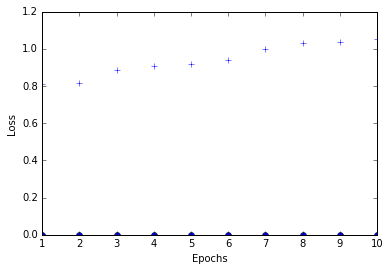

In [31]:
# Accuracy visuliziation
#Plotting Traning loss and validation loss

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo') # "bo" is for "blue dot"
plt.plot(epochs, val_loss_values, 'b+') # b+ is for "blue crosses"
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

Graph shows the loss_valus was always zero from epochs 1 to 10 but validation loss value was increasing with every passing epochs.

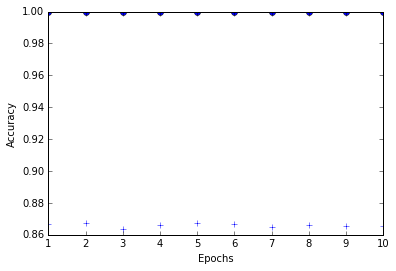

In [30]:
#Plotting traning and validation accuracy

plt.clf() # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo')
plt.plot(epochs, val_acc_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

Above graph shows traning accuracy was always 100% but validation accuracy was some what linear and close to 87%

In [32]:
# Let's test our model on test data
model.predict(x_test)

array([[  1.00000000e+00],
       [  9.43055212e-01],
       [  1.00000000e+00],
       ..., 
       [  9.99999046e-01],
       [  4.03508671e-10],
       [  9.90481555e-01]], dtype=float32)

We can do some experiments for increasing the accuracy. 
1. Try to use more than 2 hidden layers 
2. Increase and decrease the size of epochs
3. Try different activalition function, optimizer and loss function.